In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [161]:
X,y=make_moons(n_samples=250, noise=0.5)

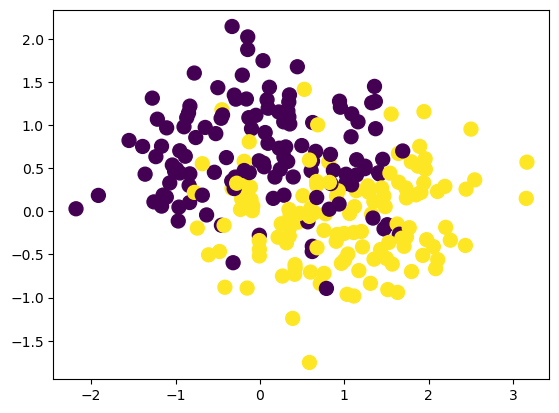

In [162]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [163]:
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().unsqueeze(1) # shape [250,1]


In [ ]:
dataset = TensorDataset(X_tensor,y_tensor)
dataloader = DataLoader(dataset,batch_size=32,shuffle=True)

In [ ]:
class DeepSigmoidNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(2, 10)
        self.fc2=nn.Linear(10,10)
        self.fc3=nn.Linear(10,10)
        self.fc4=nn.Linear(10,10)
        self.fc5=nn.Linear(10,10)
        self.fc6=nn.Linear(10,10)
        self.fc7=nn.Linear(10,10) 
        self.fc8=nn.Linear(10,10)
        self.fc9=nn.Linear(10,10)
        self.fc10=nn.Linear(10,10)
        self.output=nn.Linear(10,1)
        
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = self.activation(self.fc6(x))
        x = self.activation(self.fc7(x))
        x = self.activation(self.fc8(x))
        x = self.activation(self.fc9(x))
        x = self.activation(self.fc10(x))
        x = torch.sigmoid(self.output(x))  # Final output for binary classification
        return x
        

In [166]:
model = DeepSigmoidNN()
loss_fun= nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [167]:
old_weight = model.fc1.weight
old_weight

Parameter containing:
tensor([[ 0.2257,  0.1134],
        [ 0.2055, -0.2011],
        [-0.3300,  0.3659],
        [ 0.4879, -0.3968],
        [ 0.1600, -0.4192],
        [ 0.5120, -0.3040],
        [-0.3383, -0.1307],
        [-0.1183, -0.5927],
        [-0.6096, -0.7062],
        [ 0.2502,  0.4760]], requires_grad=True)

In [168]:
def compute_accuracy(preds, labels):
    preds = (preds > 0.5).float()
    correct = (preds == labels).sum().item()
    return correct/labels.size(0)

In [169]:
epochs=10
for epoch in range(epochs):
    total_loss = 0
    total_acc =0
    
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs =model(batch_X)
        loss = loss_fun(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_acc += compute_accuracy(outputs, batch_y)
        
    avg_loss = total_loss/ len(dataloader)
    avg_acc = total_acc / len(dataloader)
    
    print(f"Epoch: {epoch+1}/{epochs} | Loss: {avg_loss:.4f} | Accuracy: {avg_acc:.4f}")
    
        

Epoch: 1/10 | Loss: 0.6932 | Accuracy: 0.5000
Epoch: 2/10 | Loss: 0.6932 | Accuracy: 0.5009
Epoch: 3/10 | Loss: 0.6933 | Accuracy: 0.4991
Epoch: 4/10 | Loss: 0.6932 | Accuracy: 0.4964
Epoch: 5/10 | Loss: 0.6932 | Accuracy: 0.4982
Epoch: 6/10 | Loss: 0.6932 | Accuracy: 0.4964
Epoch: 7/10 | Loss: 0.6932 | Accuracy: 0.4973
Epoch: 8/10 | Loss: 0.6931 | Accuracy: 0.4964
Epoch: 9/10 | Loss: 0.6930 | Accuracy: 0.4991
Epoch: 10/10 | Loss: 0.6929 | Accuracy: 0.6232


In [170]:
new_weight = model.fc1.weight 

In [171]:
new_weight

Parameter containing:
tensor([[ 0.3096,  0.0328],
        [ 0.3079, -0.3007],
        [-0.3425,  0.3715],
        [ 0.5055, -0.3781],
        [ 0.0734, -0.3301],
        [ 0.6007, -0.4090],
        [-0.3993, -0.0910],
        [-0.0159, -0.6972],
        [-0.5581, -0.7261],
        [ 0.3425,  0.3726]], requires_grad=True)

In [172]:
old_weight

Parameter containing:
tensor([[ 0.3096,  0.0328],
        [ 0.3079, -0.3007],
        [-0.3425,  0.3715],
        [ 0.5055, -0.3781],
        [ 0.0734, -0.3301],
        [ 0.6007, -0.4090],
        [-0.3993, -0.0910],
        [-0.0159, -0.6972],
        [-0.5581, -0.7261],
        [ 0.3425,  0.3726]], requires_grad=True)

In [173]:
# calculating new grads 

gradient_dl_dw = (old_weight - new_weight)/0.001
percent_change = abs(100*(old_weight - new_weight)/old_weight)

In [174]:
gradient_dl_dw

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], grad_fn=<DivBackward0>)

In [175]:
percent_change

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], grad_fn=<AbsBackward0>)